In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker




# import matplotlib as mpl

plt.style.use('enerdata_square.mplstyle')

In [3]:
f = "../data/002_processed/sni.csv"
tmp = pd.read_csv(f)

<Axes: >

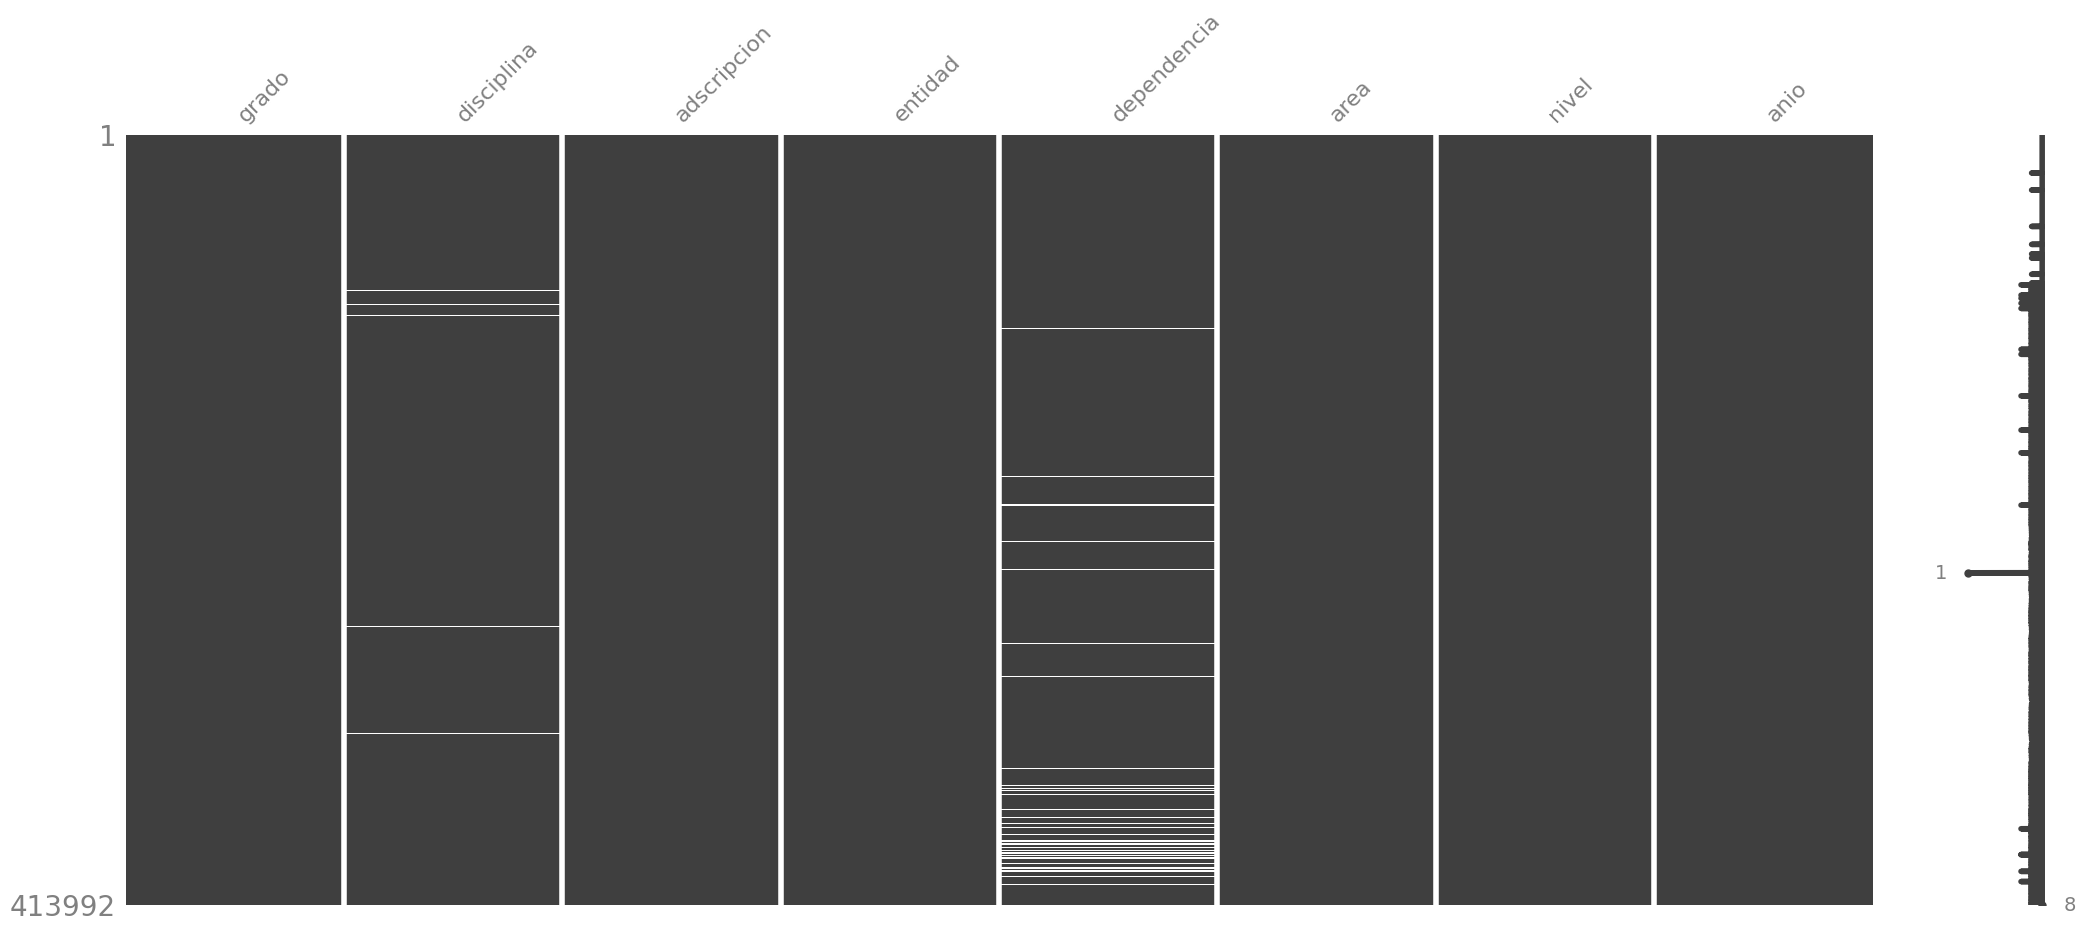

In [4]:
msno.matrix(tmp)

In [5]:
tmp.grado.unique()

array(['DR.', 'DRA.', 'M. EN C.', 'QUIM.', 'LIC.', 'MED', 'Maestría',
       'M.EN C.', 'M. EN I', 'MED.', 'MTRO.', 'BIOL.', 'ING.', 'M.C.',
       'M. EN I.', 'MTRA.', 'M.V.Z.', 'MTR', 'Q.F.B', 'M. EN C',
       'M. EN B.', 'ARQ.', 'FIS.', 'M. EN A', 'Q.F.B.', 'M.I.Q.',
       'Q. F. B.', 'ESPECIALIDAD', 'M EN C.', 'MED. ESP.', 'M.I.',
       'Q.B.P.', 'MTR0.', 'M. I.', 'M. C.', 'PSIC.', 'MAESTRIA', 'CP.',
       nan, 'Especialidad', 'MAT.', 'BIOQ.', 'QFB.', 'M. EN A.', 'QUIM,.',
       '-', 'LIC'], dtype=object)

In [6]:
# SNI solo tiene los campos definidos con la lista grados,
# pues son los únicos que se pueden identificar como hombre,mujer
grados = ["DR.","DRA.","MTRO.","MTRA."]
sni = tmp[tmp["grado"].isin(grados)].copy()
mapeo_sexo = {
    'DR.': 'H',
    'MTRO.': 'H',
    'DRA.': 'M',
    'MTRA.': 'M'
}

# Crear la nueva columna "sexo" usando el mapeo
sni['sexo'] = sni['grado'].map(mapeo_sexo)


In [7]:
sni.anio.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2023])

In [9]:
historico = sni.groupby(["anio"]).size()
historico

anio
2000     6942
2001     7514
2002     8667
2003     8667
2004     9613
2005    10287
2006    11404
2007    12662
2008    13756
2009    14522
2010    15408
2011    16305
2012    17057
2013    18085
2014    19472
2015    21182
2016    22901
2017    24970
2018    26501
2019    28427
2020    32288
2023    40575
dtype: int64

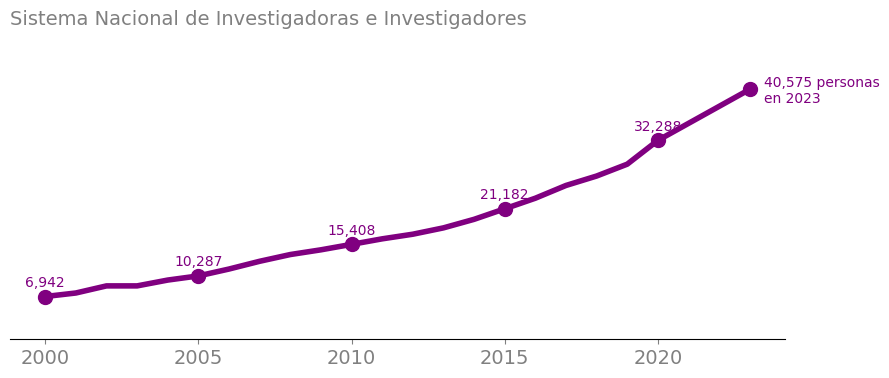

In [21]:

fig, ax = plt.subplots()

# --- Gráfica de líneas (tu código de ejemplo) ---
ax.plot(historico.index, historico, color="purple", label="Hombres")

# Eliminamos el eje y (ticks, labels y línea del eje)
ax.yaxis.set_visible(False)
ax.tick_params(axis='y', which='both', left=False, labelleft=False)


# --- Marcadores y anotaciones de las series ---
last_year = total_anios.index.max()

# # Serie de Hombres
for anio, valor in historico.items():
    if anio % 5 == 0 or anio == last_year:
        ax.plot(anio, valor, 'o', color="purple")
        if anio == last_year:
            label = f"{valor:,.0f} personas\nen {anio}"
            ha_align = "left"
            xy_coords = (anio, valor + 100)
            offset = (10, -10)
        else:
            label = f"{valor:,.0f}"
            ha_align = "center"
            xy_coords = (anio, valor + 30)
            offset = (0, 7)
        ax.annotate(label,
                    xy=xy_coords,
                    xytext=offset,
                    textcoords="offset points",
                    ha=ha_align,
                    color="purple",
                    fontsize=10)

# # Serie de Mujeres
# for anio, valor in total_anios["M"].items():
#     if anio % 5 == 0 or anio == last_year:
#         ax.plot(anio, valor, 'o', color="seagreen")
#         if anio == last_year:
#             label = f"{valor:,.0f} mujeres\nen {anio}"
#             ha_align = "left"
#             xy_coords = (anio, valor + 100)
#             offset = (10, -10)
#         else:
#             label = f"{valor:,.0f}"
#             ha_align = "center"
#             xy_coords = (anio, valor + 30)
#             offset = (0, 10)
#         ax.annotate(label,
#                     xy=xy_coords,
#                     xytext=offset,
#                     textcoords="offset points",
#                     ha=ha_align,
#                     color="seagreen",
#                     fontsize=12)
                    
# --- Título usando ax.annotate ---
# Se arma en dos líneas, usando coordenadas en "axes fraction" para posicionarlo relativo al área de la gráfica.
# La primera línea se compone de varias anotaciones:
#   "Número de " (color por defecto),
#   "mujeres" (en seagreen),
#   " y " (color por defecto),
#   "hombres" (en naranja),
#   " en el" (en gris).
# ax.annotate("Número de ", 
#             xy=(0, 1.1), xycoords="axes fraction", 
#             ha="left", va="bottom", fontsize=14)
# ax.annotate("mujeres", 
#             xy=(0.15, 1.1), xycoords="axes fraction", 
#             ha="left", va="bottom", fontsize=14, color="seagreen")
# ax.annotate(" y ", 
#             xy=(0.25, 1.1), xycoords="axes fraction", 
#             ha="left", va="bottom", fontsize=14)
# ax.annotate("hombres", 
#             xy=(0.28, 1.1), xycoords="axes fraction", 
#             ha="left", va="bottom", fontsize=14, color="orange")
# ax.annotate(" en el", 
#             xy=(0.39, 1.1), xycoords="axes fraction", 
#             ha="left", va="bottom", fontsize=14, color="gray")

# Segunda línea completa del título
ax.annotate("Sistema Nacional de Investigadoras e Investigadores", 
            xy=(0, 1.07), xycoords="axes fraction", 
            ha="left", va="top", fontsize=14)
ax.set_ylim(0,50000)
plt.show()
fig.savefig("../historico.png")

In [11]:
total_anios = sni.groupby(["anio", "sexo"]).size().unstack(fill_value=0)

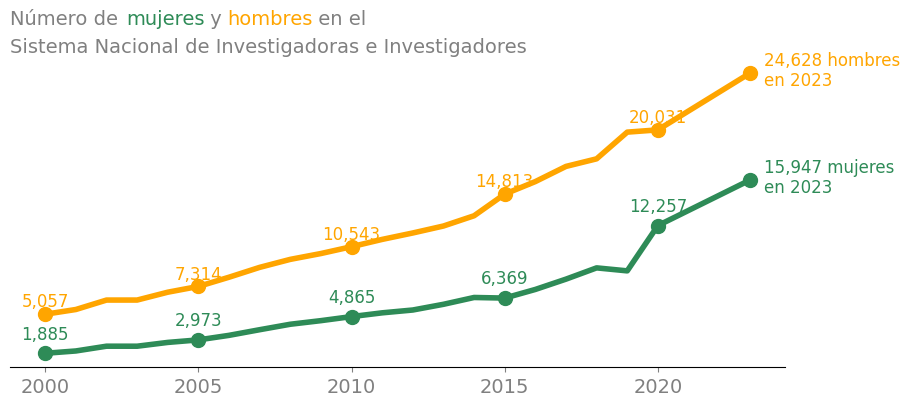

In [12]:

fig, ax = plt.subplots()

# --- Gráfica de líneas (tu código de ejemplo) ---
ax.plot(total_anios.index, total_anios["H"], color="orange", label="Hombres")
ax.plot(total_anios.index, total_anios["M"], color="seagreen", label="Mujeres")

# Eliminamos el eje y (ticks, labels y línea del eje)
ax.yaxis.set_visible(False)
ax.tick_params(axis='y', which='both', left=False, labelleft=False)

# (Si usabas ax.set_ylabel, lo comentamos o eliminamos)
# ax.set_ylabel("Personas")
# ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))

# --- Marcadores y anotaciones de las series ---
last_year = total_anios.index.max()

# Serie de Hombres
for anio, valor in total_anios["H"].items():
    if anio % 5 == 0 or anio == last_year:
        ax.plot(anio, valor, 'o', color="orange")
        if anio == last_year:
            label = f"{valor:,.0f} hombres\nen {anio}"
            ha_align = "left"
            xy_coords = (anio, valor + 100)
            offset = (10, -10)
        else:
            label = f"{valor:,.0f}"
            ha_align = "center"
            xy_coords = (anio, valor + 30)
            offset = (0, 5)
        ax.annotate(label,
                    xy=xy_coords,
                    xytext=offset,
                    textcoords="offset points",
                    ha=ha_align,
                    color="orange",
                    fontsize=12)

# Serie de Mujeres
for anio, valor in total_anios["M"].items():
    if anio % 5 == 0 or anio == last_year:
        ax.plot(anio, valor, 'o', color="seagreen")
        if anio == last_year:
            label = f"{valor:,.0f} mujeres\nen {anio}"
            ha_align = "left"
            xy_coords = (anio, valor + 100)
            offset = (10, -10)
        else:
            label = f"{valor:,.0f}"
            ha_align = "center"
            xy_coords = (anio, valor + 30)
            offset = (0, 10)
        ax.annotate(label,
                    xy=xy_coords,
                    xytext=offset,
                    textcoords="offset points",
                    ha=ha_align,
                    color="seagreen",
                    fontsize=12)
                    
# --- Título usando ax.annotate ---
# Se arma en dos líneas, usando coordenadas en "axes fraction" para posicionarlo relativo al área de la gráfica.
# La primera línea se compone de varias anotaciones:
#   "Número de " (color por defecto),
#   "mujeres" (en seagreen),
#   " y " (color por defecto),
#   "hombres" (en naranja),
#   " en el" (en gris).
ax.annotate("Número de ", 
            xy=(0, 1.1), xycoords="axes fraction", 
            ha="left", va="bottom", fontsize=14)
ax.annotate("mujeres", 
            xy=(0.15, 1.1), xycoords="axes fraction", 
            ha="left", va="bottom", fontsize=14, color="seagreen")
ax.annotate(" y ", 
            xy=(0.25, 1.1), xycoords="axes fraction", 
            ha="left", va="bottom", fontsize=14)
ax.annotate("hombres", 
            xy=(0.28, 1.1), xycoords="axes fraction", 
            ha="left", va="bottom", fontsize=14, color="orange")
ax.annotate(" en el", 
            xy=(0.39, 1.1), xycoords="axes fraction", 
            ha="left", va="bottom", fontsize=14, color="gray")

# Segunda línea completa del título
ax.annotate("Sistema Nacional de Investigadoras e Investigadores", 
            xy=(0, 1.07), xycoords="axes fraction", 
            ha="left", va="top", fontsize=14)

plt.show()


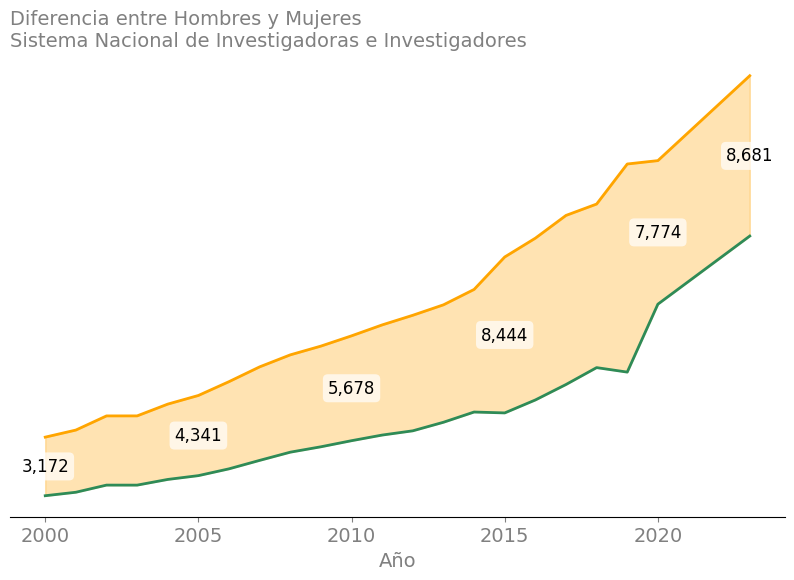

In [9]:
fig, ax = plt.subplots(figsize=(10,6))


# Eliminamos el eje y (ticks, labels y línea del eje)
ax.yaxis.set_visible(False)
ax.tick_params(axis='y', which='both', left=False, labelleft=False)


# --- Trazamos las líneas para Hombres y Mujeres ---
ax.plot(total_anios.index, total_anios["H"], color="orange", label="Hombres", linewidth=2)
ax.plot(total_anios.index, total_anios["M"], color="seagreen", label="Mujeres", linewidth=2)

# --- Relleno del área entre las dos curvas para resaltar la diferencia ---
ax.fill_between(total_anios.index, total_anios["H"], total_anios["M"],
                where=(total_anios["H"] >= total_anios["M"]),
                interpolate=True, color="orange", alpha=0.3, label="Mayor Hombres")
ax.fill_between(total_anios.index, total_anios["H"], total_anios["M"],
                where=(total_anios["H"] < total_anios["M"]),
                interpolate=True, color="seagreen", alpha=0.3, label="Mayor Mujeres")

# --- Formateo de ejes ---
ax.set_xlabel("Año")
ax.set_ylabel("Cantidad de personas")
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))

# --- Título en dos líneas, alineado a la izquierda ---
title = ("Diferencia entre Hombres y Mujeres\n"
         "Sistema Nacional de Investigadoras e Investigadores")
ax.set_title(title, loc="left", fontsize=14)

# --- Anotaciones de la diferencia ---
# Se itera sobre cada año y se anota la diferencia (valor absoluto) entre las series
# en el centro vertical entre ambas curvas.
last_year = total_anios.index.max()
for anio, h_value in total_anios["H"].items():
    if anio % 5 == 0 or anio == last_year:
        m_value = total_anios["M"].loc[anio]
        diff = abs(h_value - m_value)
        mid_y = (h_value + m_value) / 2
        ax.annotate(f"{diff:,.0f}",
                    xy=(anio, mid_y),
                    ha="center", va="center",
                    fontsize=12, color="black",
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.7))

# ax.legend(loc="best")
plt.show()
